# Hackathon

Some utilities

## Import Utils

In [3]:
import keras
from keras.metrics import top_k_categorical_accuracy
import h5py as h5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

PATH_DATA = '/notebooks/data/full_7classes.h5'
OUT_PATH = '/notebooks/data/big_sampled_7classes.h5'

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
def get_idxs(h5_path):
    f = h5.File(h5_path)
    return range(len(f['S2']))

def shuffle_idx(sample_idxs):
    return list(np.random.permutation(sample_idxs))

def split_train_val(sample_idxs, proportion):
    n_samples = len(sample_idxs)
    return sample_idxs[:int((1.-proportion)*n_samples)], sample_idxs[int((1.-proportion)*n_samples):]

def get_batch_count(idxs, batch_size):
    batch_count = int(len(idxs)//batch_size)
    remained_samples = len(idxs)%batch_size
    if remained_samples > 0:
        batch_count += 1
    return batch_count

In [5]:
idxs = get_idxs(PATH_DATA)
shuffled_idxs = shuffle_idx(idxs)
print(len(idxs))

15880245


In [6]:
label = h5.File(PATH_DATA)['TOP_LANDCOVER']
images = h5.File(PATH_DATA)['S2']

[ 1.  2.  3.  5. 10. 12. 19.]
[3826720 1250142 2315509 2167213 1112378 4053996 1154287]


<Container object of 7 artists>

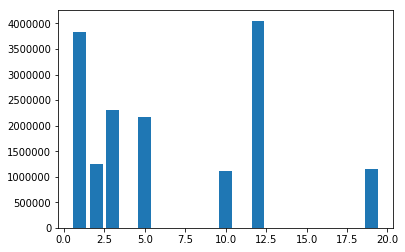

In [7]:
unique, counts = np.unique(label, return_counts=True)
print(unique)
print(counts)

plt.bar(unique, counts)

In [8]:
batch_size = 64
nb_samples = 15880245
batch_count = int(nb_samples/5/batch_size)

print(batch_count)

49625


In [ ]:
import os

if os.path.exists(OUT_PATH):
        os.remove(OUT_PATH)
        
f = h5.File(OUT_PATH, 'w')
top_landcover_submit = f.create_dataset("TOP_LANDCOVER", [0, 1], maxshape=(None, 1))
s2_submit = f.create_dataset("S2", [0, 16,16,4], maxshape=(None, 16,16,4))

for b in range(batch_count):
    
    if(b%1000 == 0):
        print('b : ' + str(b))
    top_landcover_batch = h5.File(PATH_DATA)['TOP_LANDCOVER'][shuffled_idxs[b]:shuffled_idxs[b]+batch_size -1]
    top_landcover_batch = top_landcover_batch[0:].astype(int)
    images_batch = h5.File(PATH_DATA)['S2'][shuffled_idxs[b]:shuffled_idxs[b]+batch_size -1, :, :, :]

    top_landcover_submit.resize(top_landcover_submit.shape[0] + len(top_landcover_batch), axis=0)
    top_landcover_submit[-len(top_landcover_batch):] = top_landcover_batch[:]

    s2_submit.resize(s2_submit.shape[0] + len(top_landcover_batch), axis=0)
    s2_submit[-len(top_landcover_batch):, ::] = images_batch

f.close()  
                

b : 0
b : 1000
